# Demo

The `pymultifracs` package allows us to perform fractal and multifractal analysis of signals

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context('notebook')

## Load a real signal

Let's load a signal from a real, preprocessed MEG recording

In [4]:
from mne.io import read_raw_fif
import numpy as np
import json

In [5]:
with open('signal.npy', 'rb') as f:
    X = np.load(f)

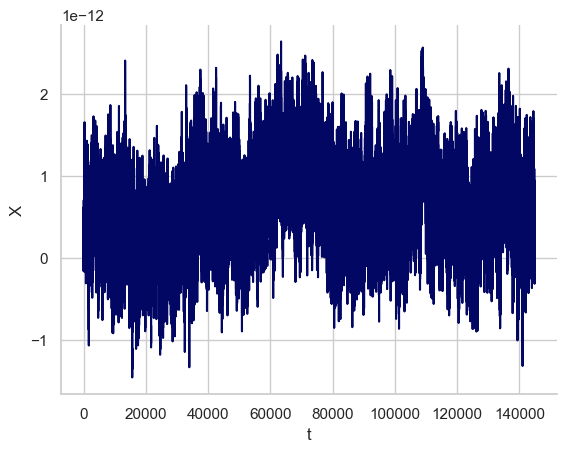

In [46]:
figure_folder = ''
plt.plot(X, c='xkcd:darkblue')
sns.despine()
# plt.title('')
plt.ylabel('X')
plt.xlabel('t')
plt.savefig(figure_folder + 'signal.pdf')
plt.show()

## PSD

In [15]:
import sys
sys.path.append("../")
import pymultifracs.psd as psd
fs = 2000

In [16]:
sns.set_style('whitegrid')

(-85.0, -70.0)

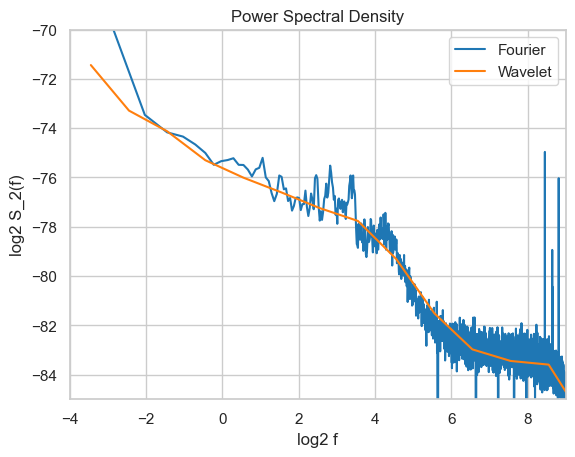

In [47]:
psd.plot_psd(X, fs, n_fft=2**14)
plt.xlim((-4, 9))
plt.ylim((-85, -70))

In [18]:
from pymultifracs.estimation import estimate_hmin
from pymultifracs.wavelet import wavelet_analysis

In [19]:
WT = wavelet_analysis(X, j1=10, j2=14, p_exp=2)

/Users/gsaes/Projets/pymultifracs/examples/../pymultifracs/wavelet.py:52: UserWarning: eta(p) = [-0.39516326] <= 0, p-Leaders correction was not                        applied. A smaller value of p (or larger value of                        gamint) should be selected.
  warnings.warn(f"eta(p) = {eta_p} <= 0, p-Leaders correction was not\


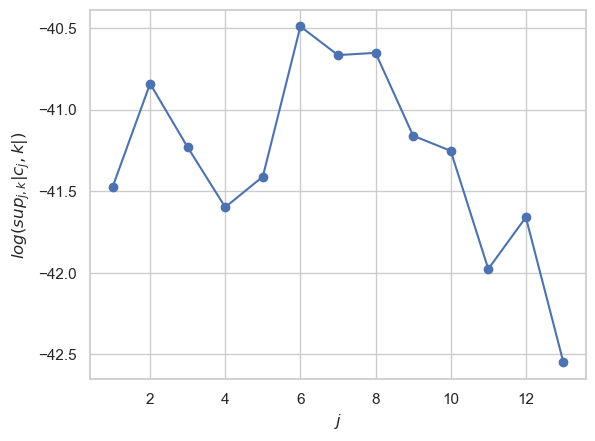

In [62]:
Jmax=len(WT.wt_coefs.values)
j_list = range(1,Jmax)
logsup = [np.log2(np.max(np.abs(WT.wt_coefs.values[i][~np.isnan(WT.wt_coefs.values[i])]))) for i in range(1,Jmax)]
plt.plot(j_list, logsup,'o-')
plt.xlabel('$j$')
plt.ylabel('$log(sup_{j,k} |c_j,k|)$')
plt.show()

La pente de la regression log-log entre 6 et 11 est de -0.277150330876809


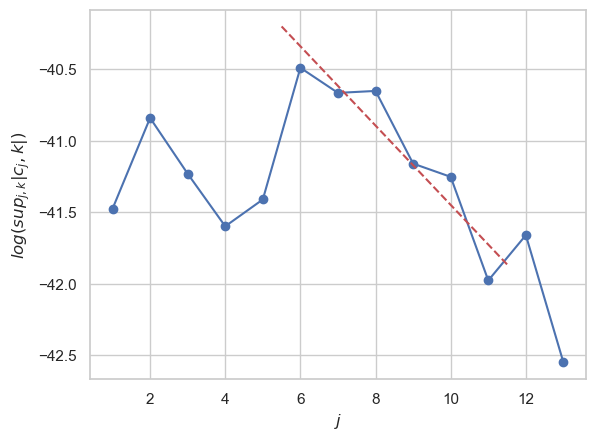

In [74]:
j1 = 6
j2 = 11
coef = np.polyfit(j_list[j1-1:j2],logsup[j1-1:j2], deg=1)
# estimate_hmin(WT.wt_coefs, scaling_ranges=[[1,Jmax-1]], weighted=True)
print(f'La pente de la regression log-log entre {j1} et {j2} est de {coef[0]}')

t = np.linspace(j1-0.5,j2+0.5,1000)
y = coef[0]*t+coef[1]

plt.plot(j_list, logsup,'o-')
plt.plot(t,y,'--r')
plt.xlabel('$j$')
plt.ylabel('$log(sup_{j,k} |c_j,k|)$')
plt.show()

**Using p-leaders**

In [75]:
from pymultifracs.utils import freq2scale, scale2freq

In [76]:
fs = 256

In [77]:
import pymultifracs.mfa as mfa

In [78]:
from pymultifracs.utils import build_q_log

In [108]:
dwt, lwt = mfa.mf_analysis_full(X,
    scaling_ranges=[[6,11]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0,
    weighted=False
)

In [109]:
dwt_sf, dwt_cumul, dwt_mfs, hmin = dwt
dwt.hmin

array([[-0.27715033]])

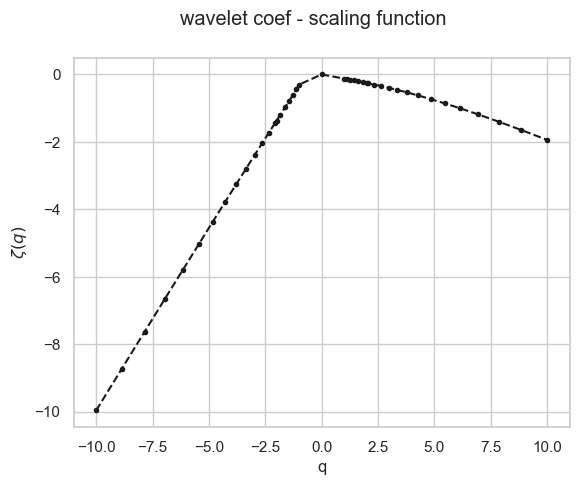

In [110]:
dwt_sf.plot_scaling()

In [111]:
dwt, lwt = mfa.mf_analysis_full(X,
    scaling_ranges=[[6,11]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.5,
    weighted=False
)

In [113]:
dwt_sf, dwt_cumul, dwt_mfs, hmin = dwt
dwt.hmin

array([[0.22284967]])

The `lwt` variable shares the same structure as `dwt`

In [114]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

The `lwt_sf`, `lwt_cumul`, `lwt_mfs` variables defined here share the same structure as the `sf`, `cumul`, and `mfs` variables defined previously

**structure functions**

In [116]:
dwt.structure.H

array([[-0.12591477]])

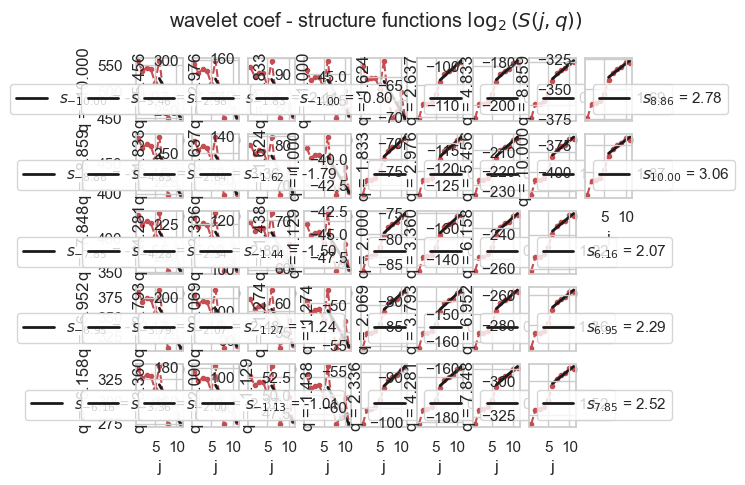

In [117]:
dwt.structure.plot(nrow=5)

**cumulants**

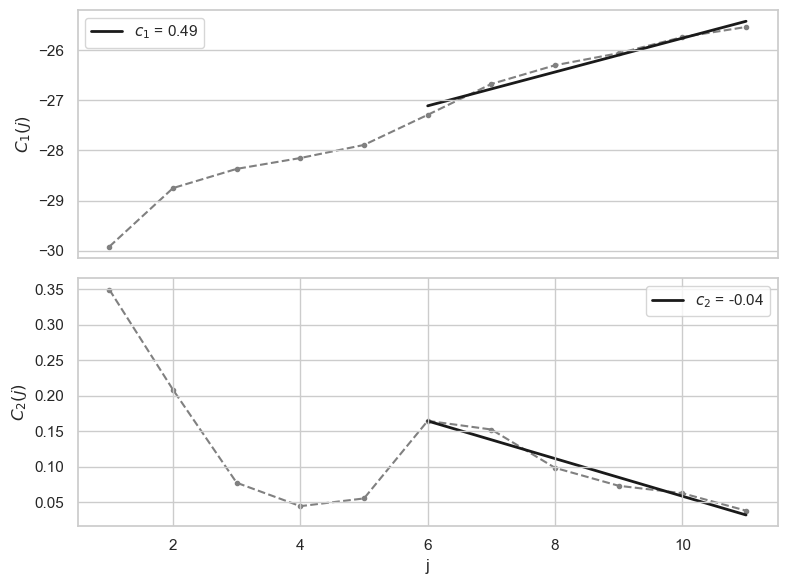

In [118]:
lwt_cumul.plot(nrow=3)

In [119]:
lwt_cumul.log_cumulants

array([[[ 0.48653552]],

       [[-0.03824148]]])

**multifractal spectrum**

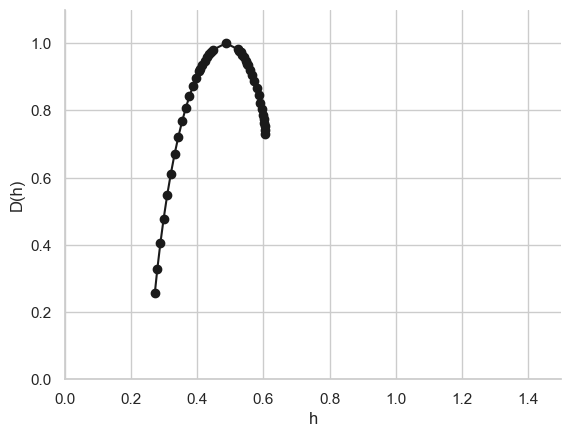

In [120]:
lwt_mfs.plot()
sns.despine()
plt.suptitle('')
plt.ylim((0, 1.1))
plt.xlim((0, 1.5))
plt.savefig(figure_folder + 'mfs.pdf')

In [40]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=8, j2=14,
    q = [2],
    n_cumul=2,
    p_exp=2,
    gamint=1.0,
    weighted=False
)

In [45]:
dwt.structure.H

array([0.98796621])

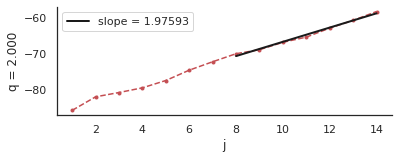

In [43]:
dwt.structure.plot(figsize=(6, 2))
plt.suptitle('')
sns.despine()

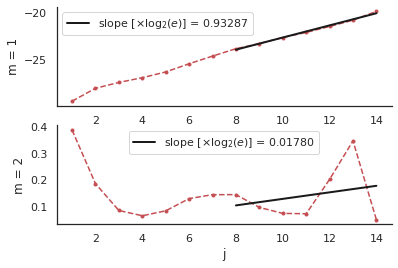

In [47]:
lwt.cumulants.plot(nrow=3)
plt.suptitle('')
sns.despine()